In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib

Matplotlib is a numerical mathematics extension NumPy and a great package to view or present data in a pictorial or graphical format. It enables analysts and decision makers to see analytics presented visually, so they can grasp difficult concepts or identify new patterns. There are two broad ways of using pyplo.

Using Global Functions
The most common and easy approach is by using global functions to build and display a global figure using matplotlib as a global state machine. Let’s look at some of the most commonly used charts. Then see Listing 2-31.

• plt.bar – creates a bar chart
• plt.scatter – makes a scatter plot
• plt.boxplot – makes a box and whisker plot
• plt.hist – makes a histogram
• plt.plot – creates a line plot

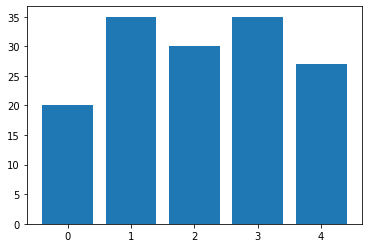

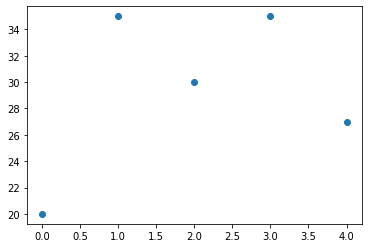

In [42]:
# simple bar and scatter plot
x = np.arange(5)          # assume there are 5 students
y = (20, 35, 30, 35, 27)  # their test scores
plt.bar(x,y)              # Bar plot
# need to close the figure using show() or close(), if not closed any follow
#up plot commands will use same figure.
plt.show()                # Try commenting this an run
plt.scatter(x,y)          # scatter plot
plt.show()

<AxesSubplot:>

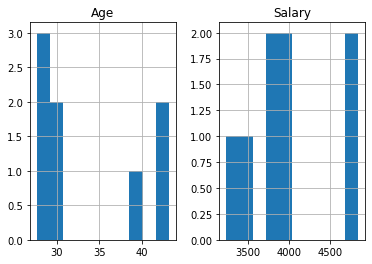

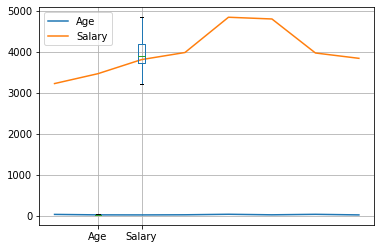

In [43]:
df = pd.DataFrame({'Name' : ['jack', 'jane', 'jack', 'jane', 'jack', 'jane',
'jack', 'jane'],'State' : ['SFO', 'SFO', 'NYK', 'CA', 'NYK', 'NYK',
'SFO', 'CA'],'Grade':['A','A','B','A','C','B','C','A'],
'Age' : np.random.uniform(24, 50, size=8),
'Salary' : np.random.uniform(3000, 5000, size=8),})
# Note that the columns are ordered automatically in their alphabetic order
df
# for custom order please use below code
# df = pd.DataFrame(data, columns = ['Name', 'State', 'Age','Salary'])
# Find max age and salary by Name / State
# with groupby, we can use all aggregate functions such as min, max, mean,count, cumsum
df.groupby(['Name','State']).max()

df.hist()# Histogram
df.plot()                           # Line Graph
df.boxplot()                        # Box plot

Customizing Labels

You can customize the labels to make them more meaningful.

In [44]:
# generate sample data
x = np.linspace(0, 20, 1000)  #100 evenly-spaced values from 0 to 50
y = np.sin(x)
# customize axis labels
plt.plot(x, y, label = 'Sample Label')
plt.title('Sample Plot Title')
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.grid(True)
# add footnote
plt.figtext(0.995, 0.01, 'Footnote', ha='right', va='bottom')
# add legend, location pick the best automatically
plt.legend(loc='best', framealpha=0.5, prop={'size':'small'})
# tight_layout() can take keyword arguments of pad, w_pad and h_pad.
# these control the extra padding around the figure border and between subplots.
# The pads are specified in fraction of fontsize.
plt.tight_layout(pad=1)
# Saving chart to a file
plt.savefig('filename.png')
plt.close()  # Close the current window to allow new plot creation on
#separate window / axis, alternatively we can use show()
plt.show()

Object Oriented

You obtain an empty figure from a global factory, and then build the plot explicitly using the methods of the Figure and the classes it contains. The Figure is the top-level container for everything on a canvas. Axes is a container class for a specific plot. A figure may contain many Axes and/or Subplots. Subplots are laid out in a grid within the Figure. Axes can be placed anywhere on the Figure. We can use the subplots factory to get the Figure and all the desired Axes at once.

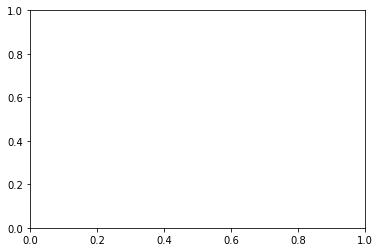

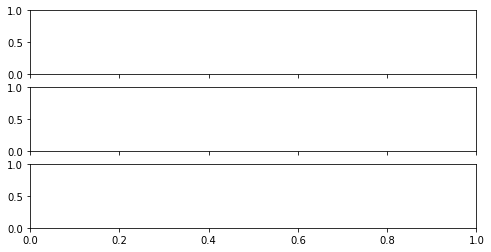

In [45]:
fig, ax = plt.subplots()
fig,(ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1, sharex=True,
figsize=(8,4))
# Iterating the Axes within a Figure
for ax in fig.get_axes():
    pass # do something

Line Plots – Using ax.plot()

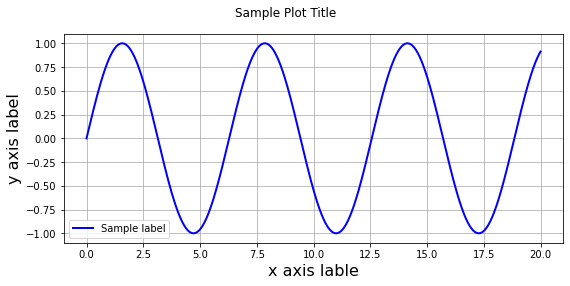

In [46]:
# generate sample data
x = np.linspace(0, 20, 1000)
y = np.sin(x)
fig = plt.figure(figsize=(8,4))
#and add an Axes
ax = fig.add_subplot(1,1,1)
ax.plot(x, y, 'b-', linewidth=2, label='Sample label') # line plot data on the Axes
# add title, labels and legend, etc.
ax.set_ylabel('y axis label', fontsize=16)             # y label
ax.set_xlabel('x axis lable', fontsize=16)             # x label
ax.legend(loc='best')
ax.grid(True)
fig.suptitle('Sample Plot Title')
fig.tight_layout(pad=1)
fig.savefig('filename.png', dpi=125)
# ---- output ----
# legend
# show grid
# title
# tidy laytout

Multiple Lines on Same Axis

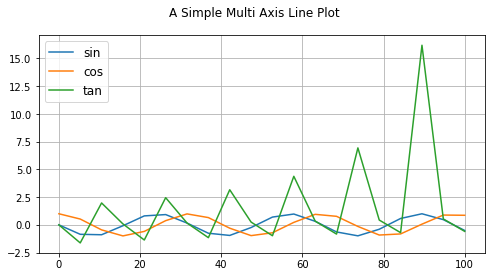

In [47]:
# get the Figure and Axes all at once
fig, ax = plt.subplots(figsize=(8,4))
x1 = np.linspace(0, 100, 20)
x2 = np.linspace(0, 100, 20)
x3 = np.linspace(0, 100, 20)
y1 = np.sin(x1)
y2 = np.cos(x2)
y3 = np.tan(x3)
ax.plot(x1, y1, label='sin')
ax.plot(x2, y2, label='cos')
ax.plot(x3, y3, label='tan')
# add grid, legend, title and save
ax.grid(True)
ax.legend(loc='best', prop={'size':'large'})
fig.suptitle('A Simple Multi Axis Line Plot')
fig.savefig('filename.png', dpi=125)

Multiple Lines on Different Axis

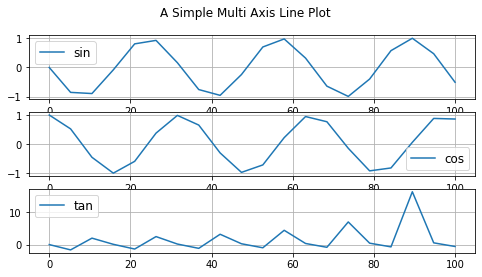

In [48]:
# Changing sharex to True will use the same x axis
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1, sharex=False, sharey =
False, figsize=(8,4))
# plot some lines
x1 = np.linspace(0, 100, 20)
x2 = np.linspace(0, 100, 20)
x3 = np.linspace(0, 100, 20)
y1 = np.sin(x1)
y2 = np.cos(x2)
y3 = np.tan(x3)
ax1.plot(x1, y1, label='sin')
ax2.plot(x2, y2, label='cos')
ax3.plot(x3, y3, label='tan')
# add grid, legend, title and save
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax1.legend(loc='best', prop={'size':'large'})
ax2.legend(loc='best', prop={'size':'large'})
ax3.legend(loc='best', prop={'size':'large'})
fig.suptitle('A Simple Multi Axis Line Plot')
fig.savefig('filename.png', dpi=125)

Control the Line Style and Marker Style

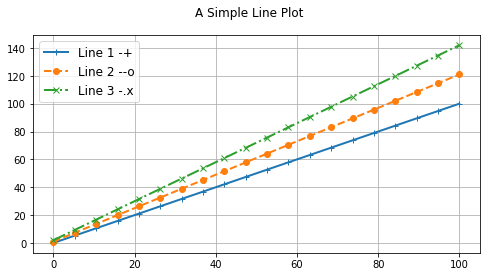

In [49]:
# get the Figure and Axes all at once
fig, ax = plt.subplots(figsize=(8,4))
# plot some lines
N = 3 # the number of lines we will plot
styles =  ['-', '--', '-.', ':']
markers = list('+ox')
x = np.linspace(0, 100, 20)
for i in range(N): # add line-by-line
    y = x + x/5*i + i
    s = styles[i % len(styles)]
    m = markers[i % len(markers)]
    ax.plot(x, y, alpha = 1, label='Line '+str(i+1)+' '+s+m,
                  marker=m, linewidth=2, linestyle=s)
# add grid, legend, title and save
ax.grid(True)
ax.legend(loc='best', prop={'size':'large'})
fig.suptitle('A Simple Line Plot')
fig.savefig('filename.png', dpi=125)

Bar Plots – using ax.bar() and ax.barh()

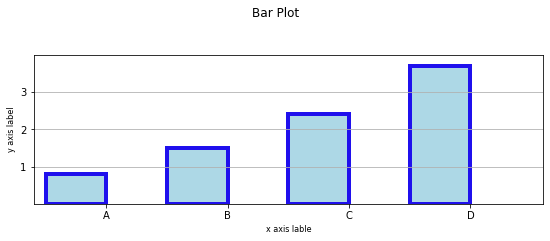

In [50]:
# get the data
N= 4
labels = list('ABCD')
data = np.array(range(N)) + np.random.rand(N)
#plot the data
fig, ax = plt.subplots(figsize=(8, 3.5))
width = 0.5
tickLocations = np.arange(N)
rectLocations = tickLocations-(width/2.0)
# for color either HEX value of the name of the color can be used
ax.bar(rectLocations, data, width,
       color='lightblue',
       edgecolor='#1f10ed', linewidth=4.0)
# tidy-up the plot
ax.set_xticks(ticks= tickLocations)
ax.set_xticklabels(labels)
ax.set_xlim(min(tickLocations)-0.6, max(tickLocations)+0.6)
ax.set_yticks(range(N)[1:])
ax.set_ylim((0,N))
ax.yaxis.grid(True)
ax.set_ylabel('y axis label', fontsize=8)
ax.set_xlabel('x axis lable', fontsize=8)
# title and save
fig.suptitle("Bar Plot")
fig.tight_layout(pad=2)
fig.savefig('filename.png', dpi=125)

Horizontal Bar Charts

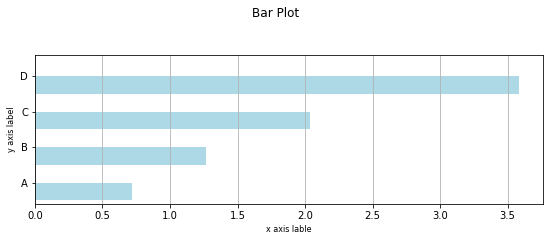

In [51]:
# get the data
N= 4
labels = list('ABCD')
data = np.array(range(N)) + np.random.rand(N)
#plot the data
fig, ax = plt.subplots(figsize=(8, 3.5))
width = 0.5;
tickLocations = np.arange(N)
rectLocations = tickLocations-(width/2.0)
# for color either HEX value of the name of the color can be used
ax.barh(rectLocations, data, width, color='lightblue')
# tidy-up the plot
ax.set_yticks(ticks= tickLocations)
ax.set_yticklabels(labels)
ax.set_ylim(min(tickLocations)-0.6, max(tickLocations)+0.6)
ax.xaxis.grid(True)
ax.set_ylabel('y axis label', fontsize=8)
ax.set_xlabel('x axis lable', fontsize=8)
# title and save
fig.suptitle("Bar Plot")
fig.tight_layout(pad=2)
fig.savefig('filename.png', dpi=125)

Side-by-Side Bar Chart

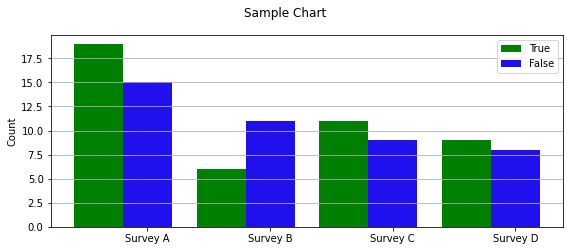

In [52]:
# generate sample data
pre = np.array([19, 6, 11, 9])
post = np.array([15, 11, 9, 8])
labels=['Survey '+x for x in list('ABCD')]
# the plot – left then right
fig, ax = plt.subplots(figsize=(8, 3.5))
width = 0.4 # bar width
xlocs = np.arange(len(pre))
ax.bar(xlocs-width, pre, width,
       color='green', label='True')
ax.bar(xlocs, post, width,
       color='#1f10ed', label='False')
# labels, grids and title, then save
ax.set_xticks(ticks=range(len(pre)))
ax.set_xticklabels(labels)
ax.yaxis.grid(True)
ax.legend(loc='best')
ax.set_ylabel('Count')
fig.suptitle('Sample Chart')
fig.tight_layout(pad=1)
fig.savefig('filename.png', dpi=125)

Stacked Bar Example Code

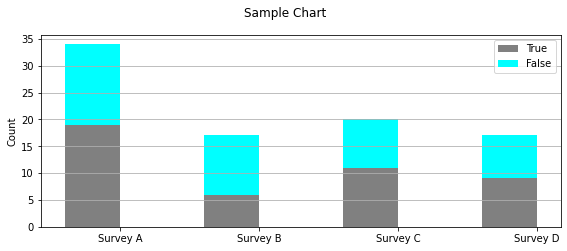

In [53]:
# generate sample data
pre = np.array([19, 6, 11, 9])
post = np.array([15, 11, 9, 8])
labels=['Survey '+x for x in list('ABCD')]
# the plot – left then right
fig, ax = plt.subplots(figsize=(8, 3.5))
width = 0.4 # bar width
xlocs = np.arange(len(pre)+2)
adjlocs = xlocs[1:-1] - width/2.0
ax.bar(adjlocs, pre, width,
       color='grey', label='True')
ax.bar(adjlocs, post, width,
       color='cyan', label='False',
       bottom=pre)
# labels, grids and title, then save
ax.set_xticks(ticks=xlocs[1:-1])
ax.set_xticklabels(labels)
ax.yaxis.grid(True)
ax.legend(loc='best')
ax.set_ylabel('Count')
fig.suptitle('Sample Chart')
fig.tight_layout(pad=1)
fig.savefig('filename.png', dpi=125)

Pie Chart – Using ax.pie()

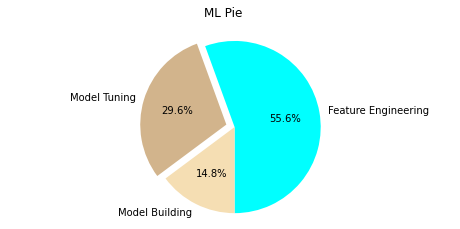

In [54]:
# generate sample data
data = np.array([15,8,4])
labels = ['Feature Engineering', 'Model Tuning', 'Model Building']
explode = (0, 0.1, 0) # explode feature engineering
colrs=['cyan', 'tan', 'wheat']
# plot
fig, ax = plt.subplots(figsize=(8, 3.5))
ax.pie(data, explode=explode,
       labels=labels, autopct='%1.1f%%',
       startangle=270, colors=colrs)
ax.axis('equal') # keep it a circle
# tidy-up and save
fig.suptitle("ML Pie")
fig.savefig('filename.png', dpi=125)

Example Code for Grid Creation

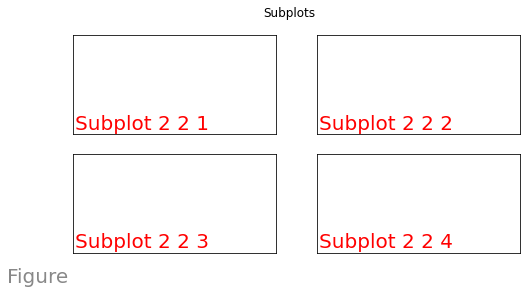

In [55]:
# Simple subplot grid layouts
fig = plt.figure(figsize=(8,4))
fig.text(x=0.01, y=0.01, s='Figure',color='#888888', ha='left', va='bottom',
fontsize=20)
for i in range(4):
    # fig.add_subplot(nrows, ncols, num)
    ax = fig.add_subplot(2, 2, i+1)
    ax.text(x=0.01, y=0.01, s='Subplot 2 2 '+str(i+1),  color='red',
ha='left', va='bottom', fontsize=20)
    ax.set_xticks([]); ax.set_yticks([])
ax.set_xticks([]); ax.set_yticks([])
fig.suptitle('Subplots')
fig.savefig('filename.png', dpi=125)

Plotting – Defaults
Matplotlib uses matplotlibrc configuration files to customize all kinds of properties, which we call rc settings or rcparameters. You can control the defaults of almost every property in matplotlib such as figure size and dpi, line width, color and style, axes, axis and grid properties, text and font properties, and so on. 

In [57]:
# get configuration file location
print (plt.matplotlib_fname())
# get configuration current settings
print (plt.rcParams)
# Change the default settings
plt.rc('figure', figsize=(8,4), dpi=125,facecolor='white',
edgecolor='white')
plt.rc('axes', facecolor='#e5e5e5',  grid=True, linewidth=1.0,
axisbelow=True)
plt.rc('grid', color='white', linestyle='-',    linewidth=2.0, alpha=1.0)
plt.rc('xtick', direction='out')
plt.rc('ytick', direction='out')
plt.rc('legend', loc='best')

AttributeError: module 'matplotlib.pyplot' has no attribute 'matplotlib_fname'